In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [18]:
def paramDis_pnorm(s, sre, p):
    maps = lambda k : s[k] if k in s else 0.0
    mapfs = lambda k : sre[k] if k in sre else 0.0
    allKeys = set(s.keys()).union(sre.keys())
    ans = 0.0
    idea = 0.0
    for k in allKeys:
        ans += abs(maps(k) - mapfs(k))**p
        idea += abs(maps(k))**p
    return ans / idea

def getAllError_calls_multiH(filename):
    calls = []
    errors = []
    with open(filename) as f:
        data = json.load(f)
    for case in data:
        if type(case) == dict:
            originalHam = case
        else :
            calls.append(case[1] + case[2])
            errors.append(paramDis_pnorm(originalHam, case[0], 1))
    return errors, calls

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
#     ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, fontsize=20)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('different settings', size=20)

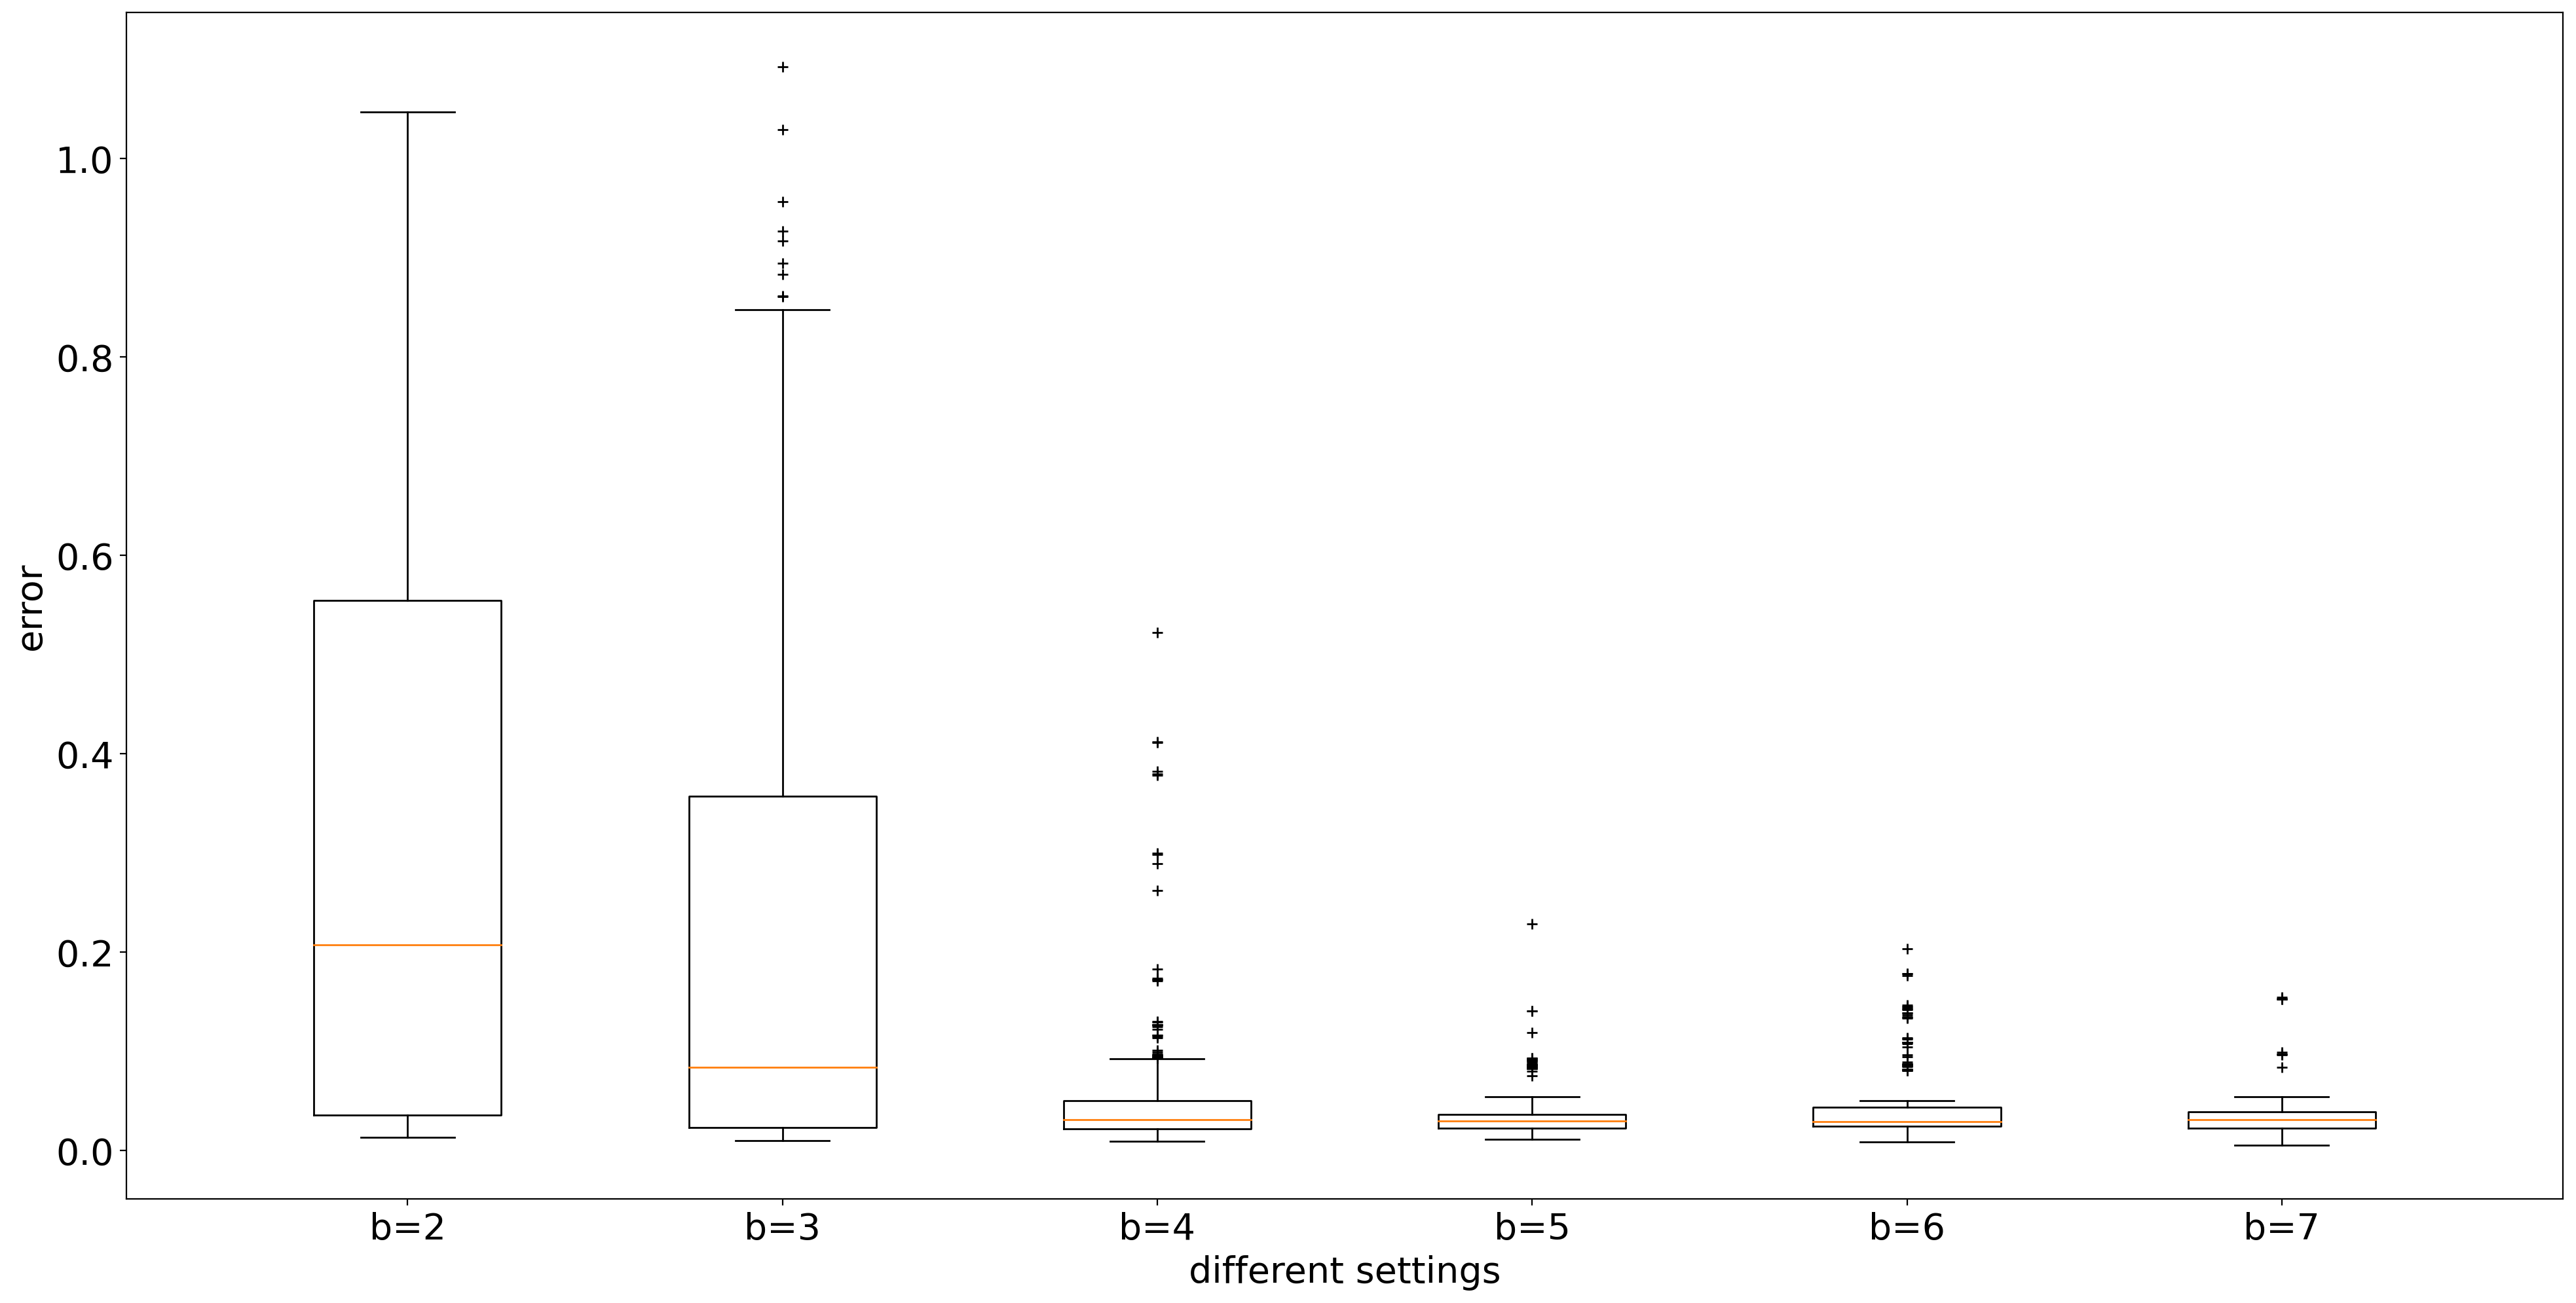

In [37]:
# useful example https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

bs = ["2",
       "3",
       "4",
       "5",
       "6",
       "7"
     ]

filenames = ["../data/strictlyRandomIsingRounds=500_b=" + x + ".json" for x in bs]
titles = [ "b=" + x for x in bs]

plotNum = 200

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(random.sample(e, plotNum))
    calls.append(random.sample(c, plotNum))

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(24, 12), sharey=True, dpi=200)
bp = ax1.boxplot(errors)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

set_axis_style(ax1, titles)
ax1.set_ylabel("error", size=20)
ax1.tick_params(axis='y', labelsize=20)
plt.savefig("Ising_n=4_varb_boxplot.svg", format="svg")
plt.show()